# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/DSBA - UTA/Course Work/Project 1/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Rows and Columns of the dataset can be obtained by using shape[] function

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 1898 rows and 9 columns


#### Observations: **There are 1898 rows and 9 columns**


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Checking the datatypes of the columns using info() function

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: **All of the above datatypes look good except that of "Rating" which should be of an "int64" datatype**


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Checking for missing values in the data using isnull() function

df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: **All the columns have 1898 observations indicating that there are zero or no missing values present in the dataset**

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Obtaining statistical summary of the data by using the describe() function

df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: **Below is the statistical summary for the minimum, average, and maximum time(in minutes) it takes for food to be prepared once an order is placed**


**Minimum: 20 mins**

**Average: 27 mins**

**Maximum: 35 mins**



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# To caluclate the number of orders not rated we will use value_counts() function
print('There are a total of',df['rating'].value_counts()[0],'orders that are not rated')

There are a total of 736 orders that are not rated


#### Observations: **There are a total of 736 orders that are not rated**


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Exploring the categorical variables**


**1. Order ID**

**2. Customer ID**

**3. Restaurant's**

**4. Cuisines**

**5. Day of the Week**

**6. Ratings**



#### **1. Order ID:**

In [ ]:
# Checking the uniqueness of the different Orders

print(f'# of unique Order IDs:',df['order_id'].nunique())

# of unique Order IDs: 1898


####Observations: **The dataset contains 1898 unqiue orders**

#### **2. Customer ID:**

In [ ]:
# Checking the uniqueness of the different Customers

print(f'# of unique customer IDs:',df['customer_id'].nunique())

# of unique customer IDs: 1200


####Observations: **The dataset contains 1200 unqiue customers from 1898 unique orders. This suggests that there are some repeat customers.**

#### **3. Restaurant's:**

In [ ]:
# Checking the uniqueness of the different Restaurants

print(f'# of unique restaurants:',df['restaurant_name'].nunique())

# of unique restaurants: 178


####Observations: **The dataset contains 178 unqiue restaurants**

#### **4. Cuisines:**

# of unique cuisines are: 14 ['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


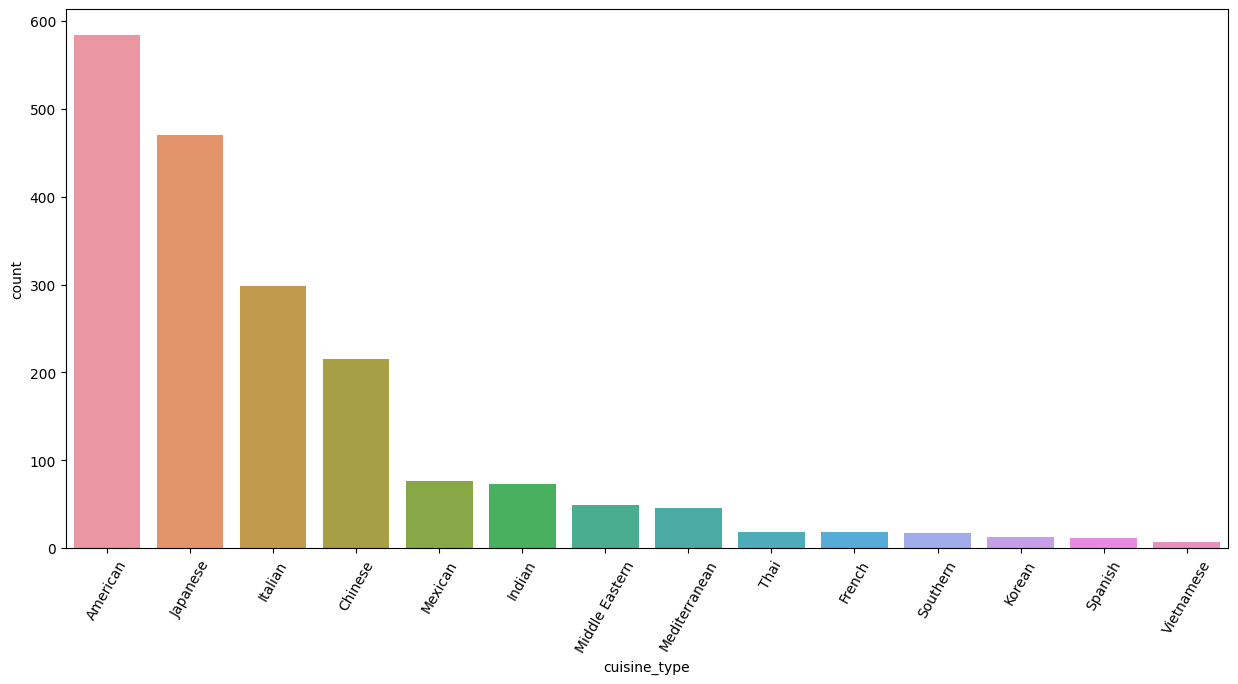

In [ ]:
# Checking the uniqueness of the different cuisine types and the most eaten cuisine types

print(f'# of unique cuisines are:',df['cuisine_type'].nunique(),df['cuisine_type'].unique())

plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type',order = df['cuisine_type'].value_counts().index)
plt.xticks(rotation = 60)
plt.show();

#### Observations: **The dataset contains 14 unqiue cuisine types. Most frequently ordered cuisine types are American, Japanese, Italian and Chinese.**

#### **5. Day of the Week:**

# of unique days of the week are: 2 ['Weekend' 'Weekday']


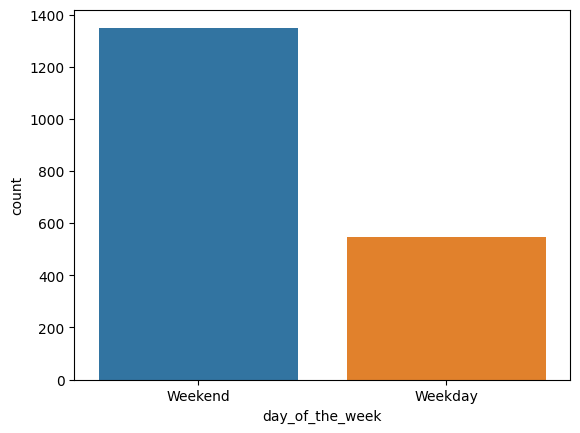

In [ ]:
# Checking the uniqueness of the different days of the week and the days of the week when most orders are placed

print(f'# of unique days of the week are:',df['day_of_the_week'].nunique(),df['day_of_the_week'].unique())

sns.countplot(data = df, x = 'day_of_the_week');

####Observations: **The dataset aggregates days of the week into Weekdays and Weekends. Most orders are placed on the Weekends.**

#### **6. Ratings:**

# of unique ratings are: 4 ['Not given' '5' '3' '4']


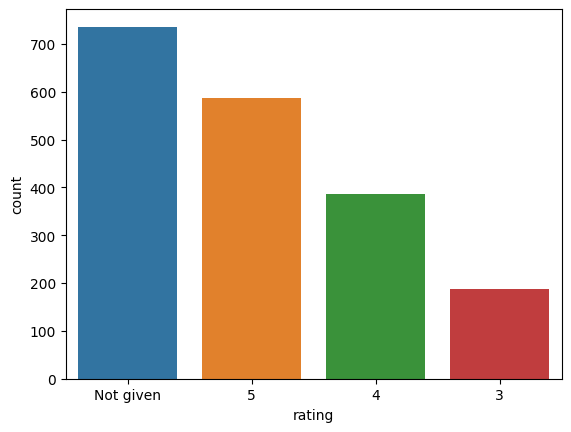

In [ ]:
# Checking the uniqueness of the different ratings given by customers and what are the most frequent ratings given for the orders placed

print(f'# of unique ratings are:',df['rating'].nunique(),df['rating'].unique())

sns.countplot(data = df, x = 'rating',order = df['rating'].value_counts().index);

####Observations: **Orders with ratings, have ratings of 3 and above. But we also have around 736 orders that are not rated**

**We shall now explore the numerical variables**

**1. Order Cost**

**2. Food Preparation Time**

**3. Food Delivery Time**



#### **1. Order Cost:**

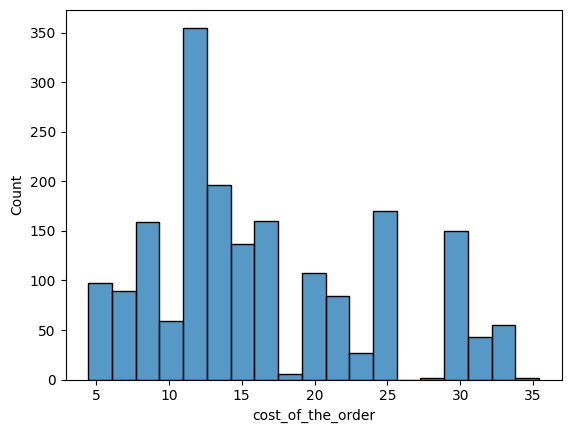

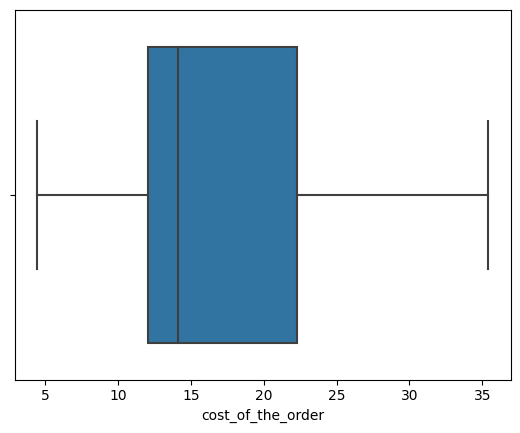

In [ ]:
# We will use Histogram and Boxplot to measure the distribution and dispersion of Order Cost within the dataset

sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

####Observations: **We can see from the Order Cost histogram and boxplot that the data is Positively Skewed (right-skewed). As seen, most of the orders possibly costs between 12 to 22 dollars (IQR).**

#### **2. Food Preparation Time:**

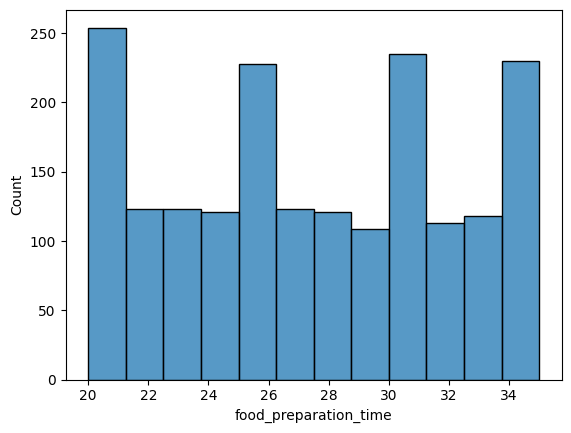

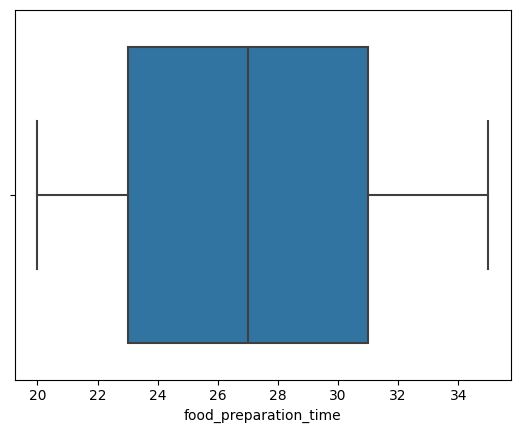

In [ ]:
# We will use Histogram and Boxplot to measure the distribution and dispersion of food preparation time within the dataset

sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

####Observations: **We can see from the Food Preparation Time histogram and boxplot that the data is normally distributed. As seen, most of the orders have prep. time between 23 mins to 31 mins.**

#### **3. Food Delivery Time:**

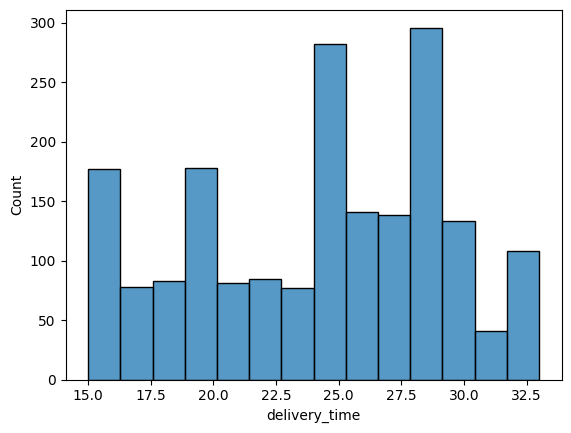

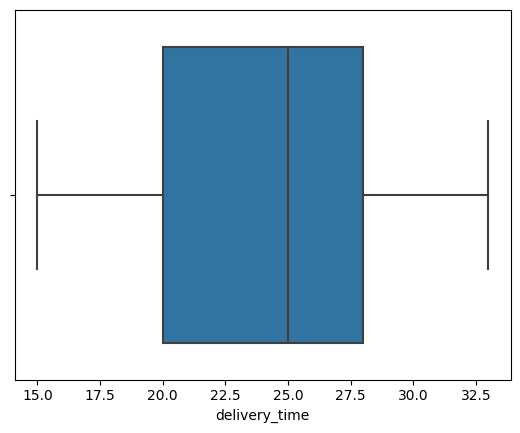

In [ ]:
# We will use Histogram and Boxplot to measure the distribution and dispersion of food delivery time within the dataset

sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

####Observations: **We can see from the Delivery Time histogram and boxplot that the data is Negatively Skewed (left-skewed). As seen, most of the orders have delivery times between 20 mins and 28 mins**

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Top 5 restaurants with highest number of orders

df['restaurant_name'].value_counts()[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: **Top 5 restaurants based on orders received are:**

**1. Shake Shack**

**2. The Meatball Shop**

**3. Blue Ribbon Sushi**

**4. Blue Ribbon Fried Chicken**

**5. Parm**



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

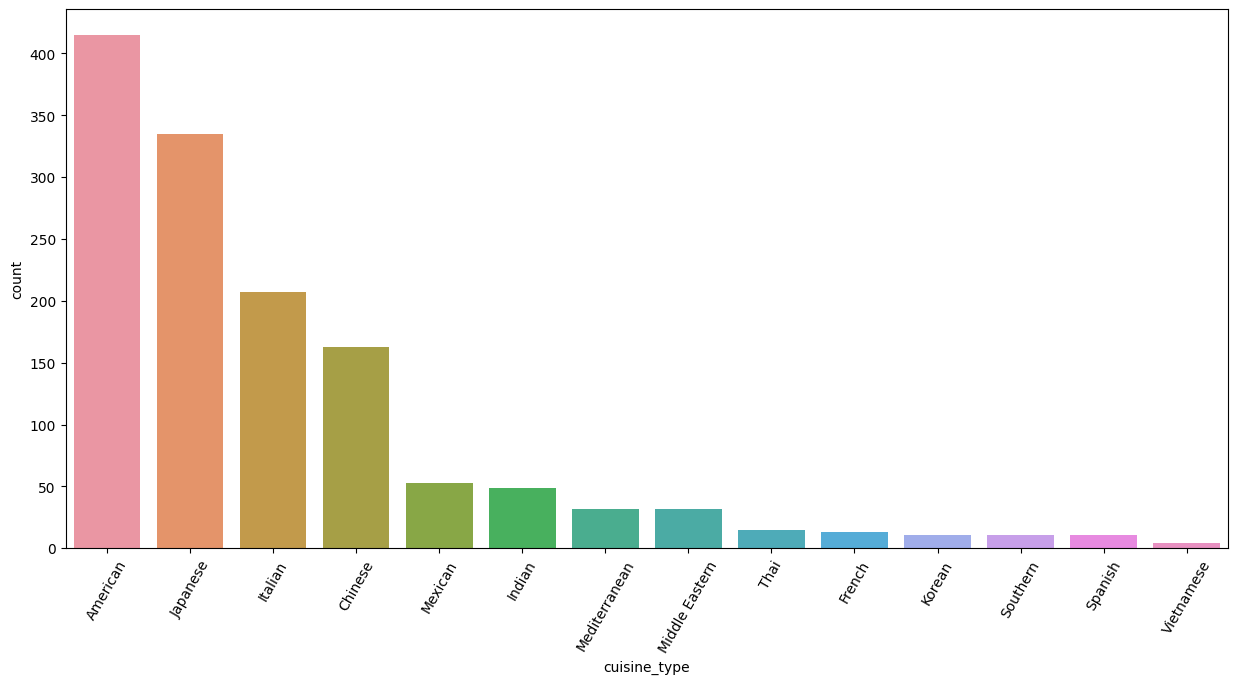

In [ ]:
# Most Popular Cuisines on weekends

df_weekend = df[df['day_of_the_week'] == 'Weekend']

plt.figure(figsize = (15,7))
sns.countplot(data = df_weekend, x = 'cuisine_type',order = df_weekend['cuisine_type'].value_counts().index)
plt.xticks(rotation = 60)
plt.show();

#### Observations: **Most popular cuisine types on weekends are American, Japanese, Italian and Chinese. They are popular cuisine types throughout the week.**


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Orders that cost more than 20 dollars

df_greater_than_20 = df[df['cost_of_the_order'] >= 20]
print(f'{df_greater_than_20.shape[0]} total orders costs more than 20 dollars')

# Total Orders
print(f'{df.shape[0]} total orders placed')

# %orders that costs more than 20 dollars
df_perct = (df_greater_than_20.shape[0] / df.shape[0]) * 100
print(f'{round(df_perct, 2)}% of total orders costs more than 20 dollars')



555 total orders costs more than 20 dollars
1898 total orders placed
29.24% of total orders costs more than 20 dollars


#### Observations: **29.24% of total orders costs more than 20 dollars**




### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Calculate the Mean Order Delivery Time

mean_order_time = df['delivery_time'].mean()
print(f'Average order delivery time is {round(mean_order_time, 2)} mins.')

Average order delivery time is 24.16 mins.


#### Observations: **Average order delivery time is 24.16 mins.**


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Identify top 3 most frequent customers

df['customer_id'].value_counts()[:3]

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: **Top 3 most frequent Customer's with number of orders are:**

**1. Customer# 52832 with 13 orders**

**2. Customer# 47440 with 10 orders**

**3. Customer# 83287 with 9 orders**



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### **1. Understanding relations between numerical and categorical variables using pointplot and boxplots**

#### **1a. Cuisine Type and Cost of the Order**

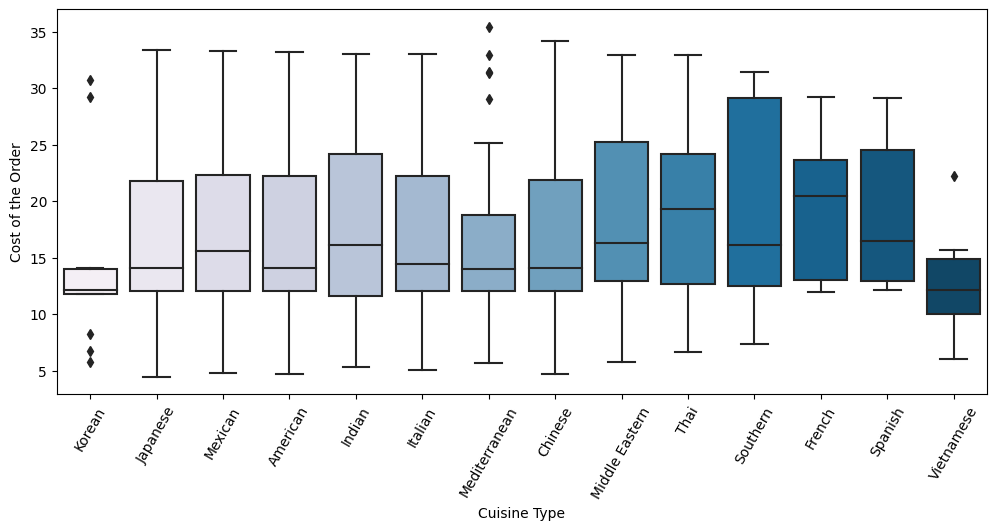

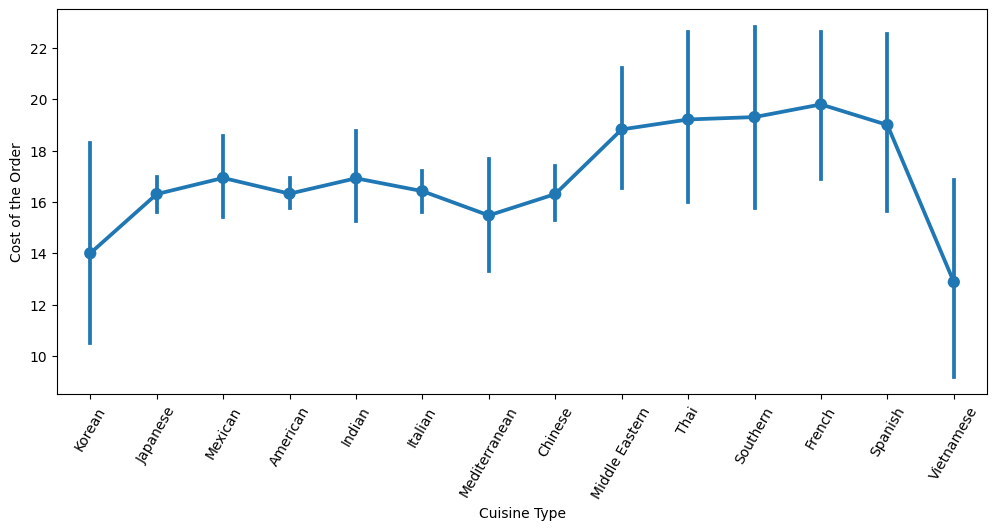

In [ ]:
# Relationship between Cuisine Type and Cost of the Order

plt.figure(figsize=(12,5))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.ylabel('Cost of the Order')
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 60)
plt.show();

plt.figure(figsize=(12,5))
sns.pointplot(data=df, x="cuisine_type", y="cost_of_the_order")
plt.ylabel('Cost of the Order')
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 60)
plt.show();

#### Observations: **As seen from above avg. cost price of Middle Eastern, Thai, Southern, French and Spanish food is high comparitively to other cuisines. Korean and Vietnamese are the low cost cuisines available.**

#### **1b. Cuisine Type and Food Preparation Time**

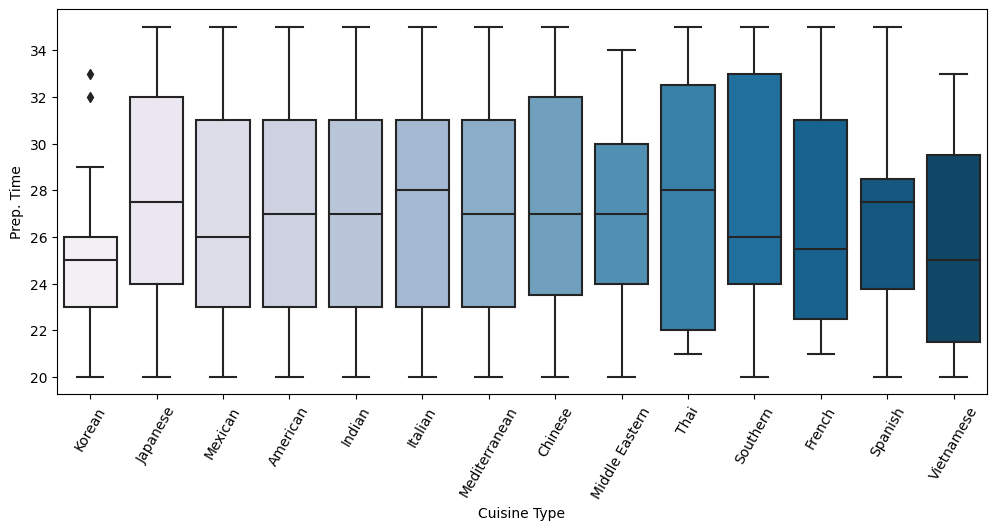

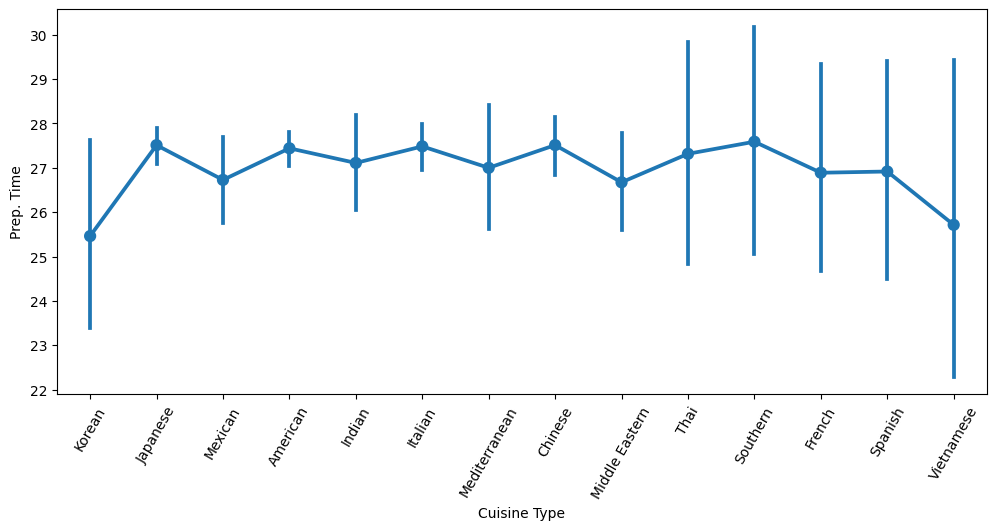

In [ ]:
# Relationship between Cuisine Type and Food Preparation Time

plt.figure(figsize=(12,5))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.ylabel('Prep. Time')
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 60)
plt.show();

plt.figure(figsize=(12,5))
sns.pointplot(data=df, x="cuisine_type", y="food_preparation_time")
plt.ylabel('Prep. Time')
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 60)
plt.show();

#### Observations: **As seen from above avg. food preparation time for Korean and Vietnamese food is the lowest compared to other cuisines.**

#### **1c. Cuisine Type and Food Delivery Time**

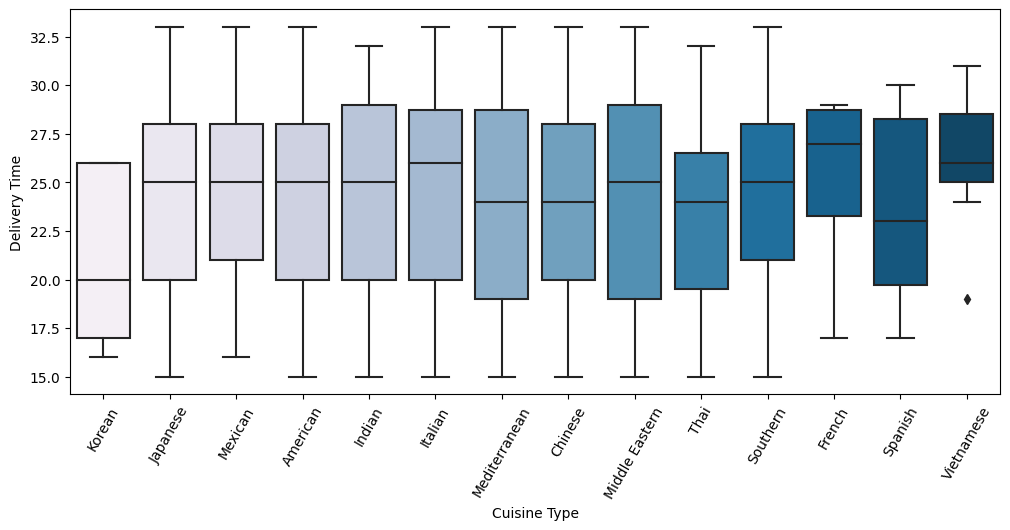

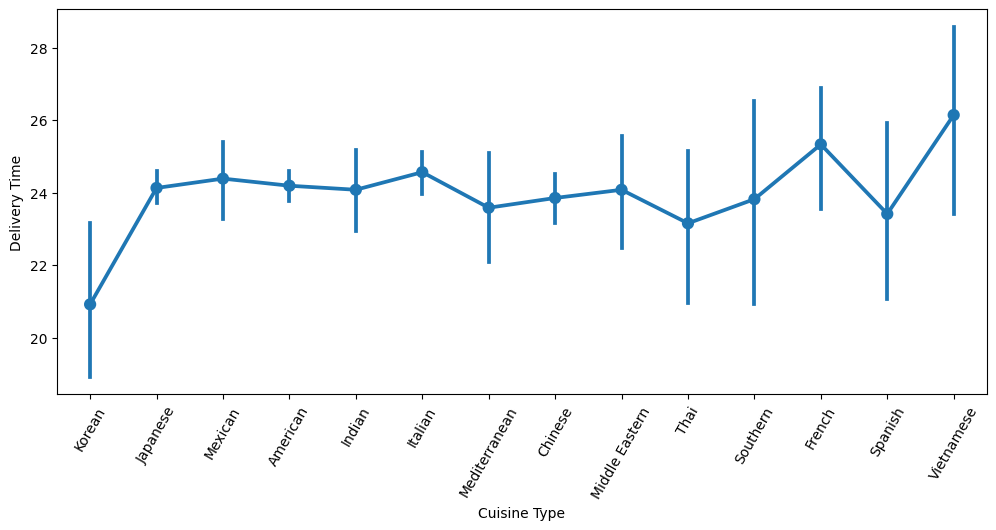

In [ ]:
# Relationship between Cuisine Type and Food Delivery Time

plt.figure(figsize=(12,5))
sns.boxplot(x = "cuisine_type", y = "delivery_time", data = df, palette = 'PuBu')
plt.ylabel('Delivery Time')
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 60)
plt.show();

plt.figure(figsize=(12,5))
sns.pointplot(data=df, x="cuisine_type", y="delivery_time")
plt.ylabel('Delivery Time')
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 60)
plt.show();

#### Observations:

**1. As seen from above avg. food delivery time is lowest for Korean cuisine.**

**2. Whereas, avg. delivery time for Vietnamese cuisines is highest. This could be possibly be either due to the low popularity of the Vietnamese cuisine resulting in less availability of delivery persons delivering the food or the Vietnamese restaurants being far away from the customers and delivery company or combination of both**

**3. Although, the food preparation time for Vietnamese is lowest,but the delivery time is the highest. This could eventually result in unsatisfactory customers and unpleasant experience.**

#### **2a. Day of the Week and Cost of the Order**

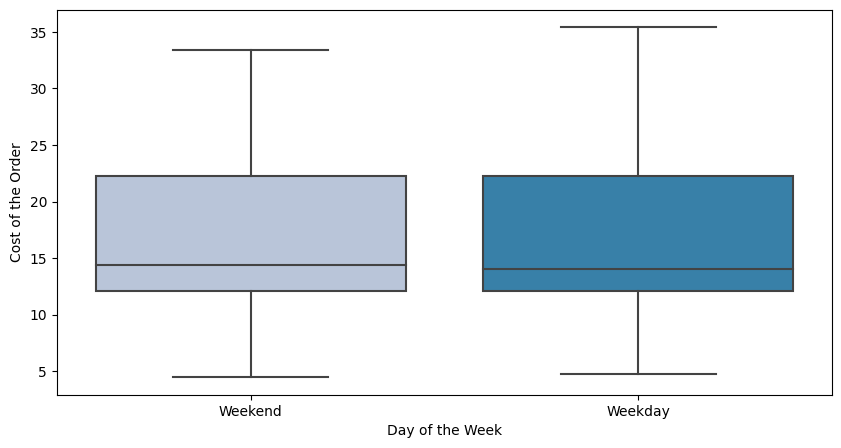

In [ ]:
# Relationship between Day of the Week and Cost of the Order

plt.figure(figsize=(10,5))
sns.boxplot(x = "day_of_the_week", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.ylabel('Cost of the Order')
plt.xlabel('Day of the Week')
plt.show();


#### Observations: **As seen from above there does not seem to be any significant relationship between the days of the week and cost of the order. Avg. cost of the order remains same throughout the week**

#### **2b. Day of the Week and Food Preparation Time**

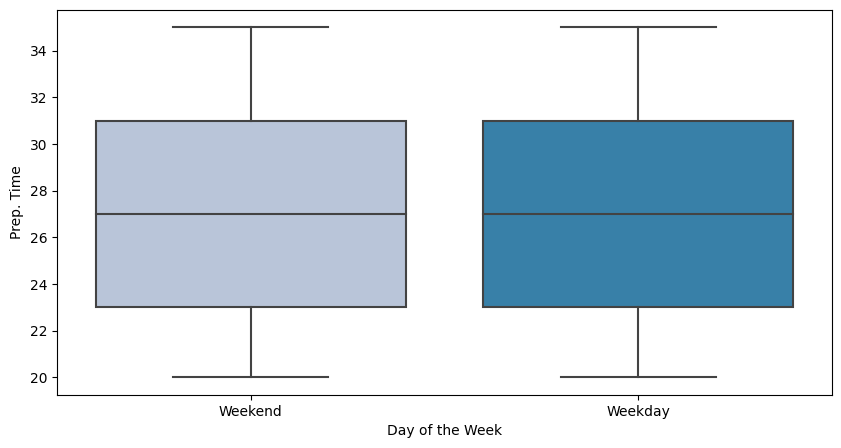

In [ ]:
# Relationship between Day of the Week and Food Preparation Time

plt.figure(figsize=(10,5))
sns.boxplot(x = "day_of_the_week", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.ylabel('Prep. Time')
plt.xlabel('Day of the Week')
plt.show();


#### Observations: **As seen from above there does not seem to be any significant relationship between the days of the week and food preparation time. Suprisingly, avg. food preparation time remains same throughout the week even though the orders over the weekend are more compared to the weekdays**

#### **2c. Day of the Week and Food Delivery Time**

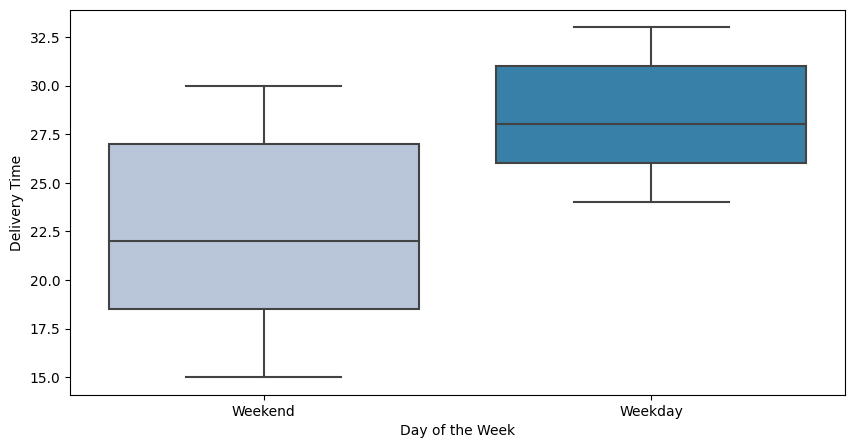

In [ ]:
# Relationship between Day of the Week and Food Delivery Time

plt.figure(figsize=(10,5))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')
plt.ylabel('Delivery Time')
plt.xlabel('Day of the Week')
plt.show();


#### Observations: **As seen from above avg. food delivery time is significantly more for the weekdays than weekends. Assuming people travel to work on weekdays leading to more than normal travel time**

#### **3a. Ratings and Cost of the Order**

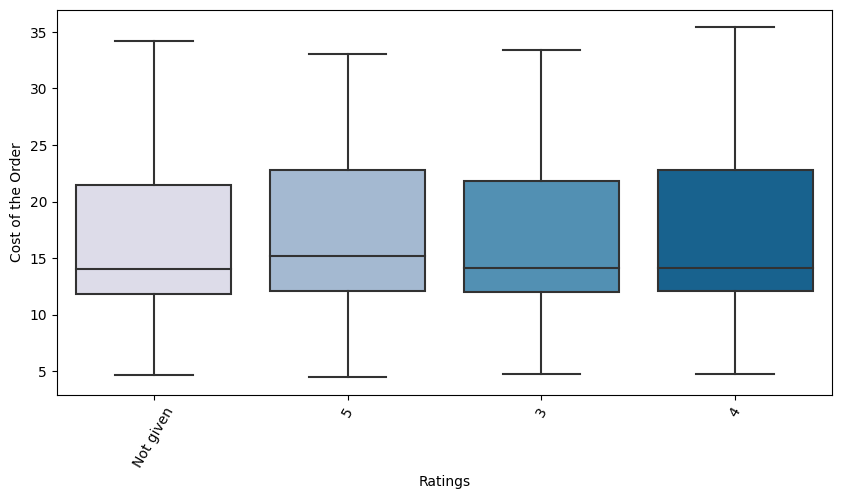

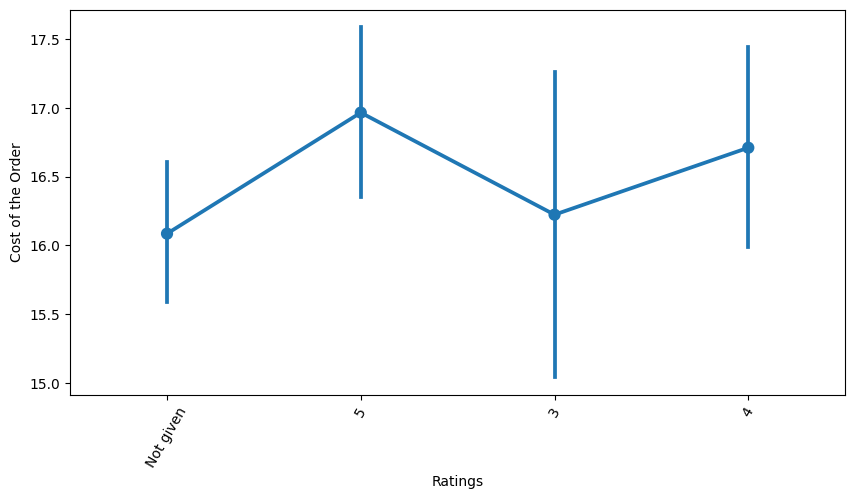

In [ ]:
# Relationship between Ratings and Cost of the Order

plt.figure(figsize=(10,5))
sns.boxplot(x = "rating", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.ylabel('Cost of the Order')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)
plt.show();

plt.figure(figsize=(10,5))
sns.pointplot(data=df, x="rating", y="cost_of_the_order")
plt.ylabel('Cost of the Order')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)
plt.show();


#### Observations: **As seen from above orders that have received 4 and 5 star ratings have a higher avg. order cost compared to others.**

#### **3b. Ratings and Food Preparation Time**

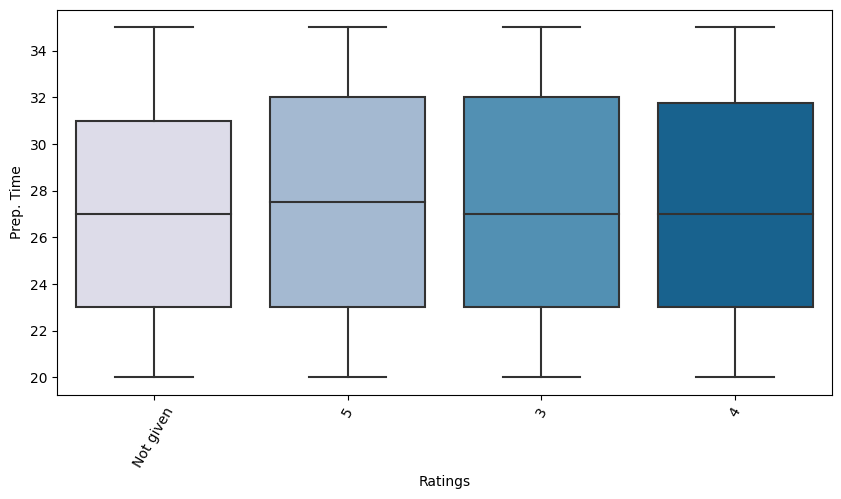

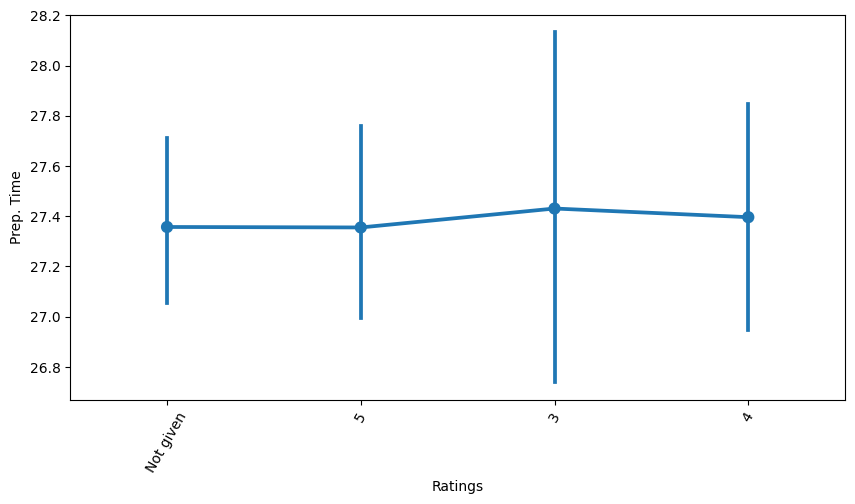

In [ ]:
# Relationship between Ratings and Food Preparation Time

plt.figure(figsize=(10,5))
sns.boxplot(x = "rating", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.ylabel('Prep. Time')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)
plt.show();

plt.figure(figsize=(10,5))
sns.pointplot(data=df, x="rating", y="food_preparation_time")
plt.ylabel('Prep. Time')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)
plt.show();


#### Observations: **As seen from above there does not seem to be any significant relationship between the ratings and food preparation time.**

#### **3c. Ratings and Food Delivery Time**

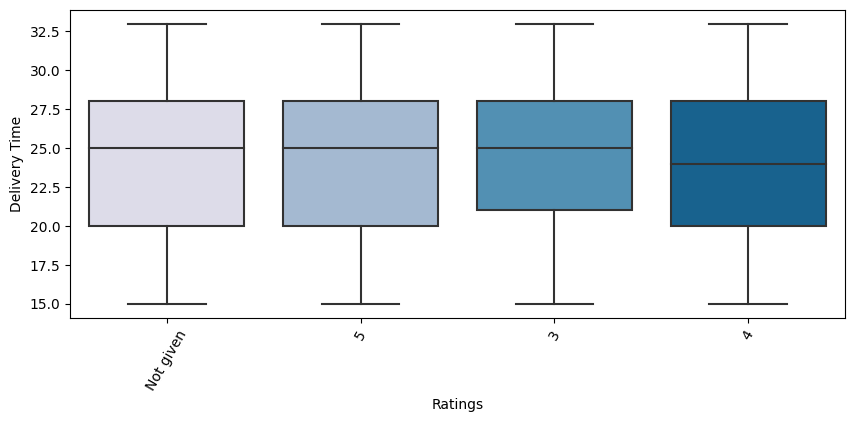

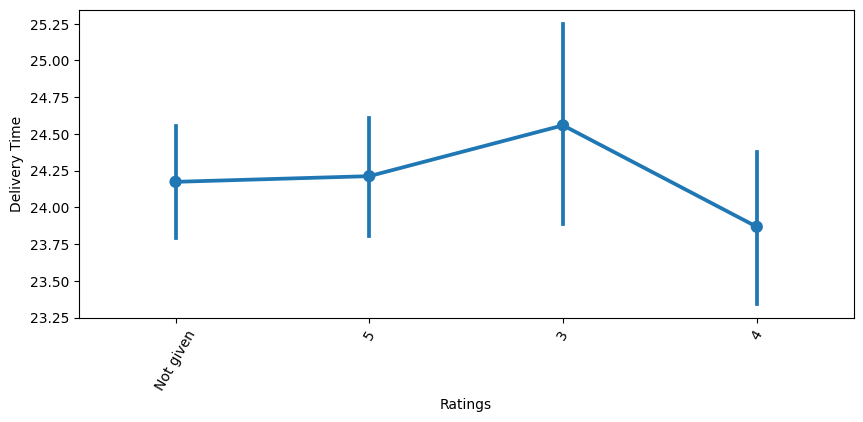

In [ ]:
# Relationship between Ratings and Food Delivery Time

plt.figure(figsize=(10,5))
sns.boxplot(x = "rating", y = "delivery_time", data = df, palette = 'PuBu')
plt.ylabel('Delivery Time')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)
plt.show();

plt.figure(figsize=(10,5))
sns.pointplot(data=df, x="rating", y="delivery_time")
plt.ylabel('Delivery Time')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)
plt.show();

#### Observations: **As expected orders that have high avg. food delivery time  have received low ratings (3 stars)**

### **2. Understanding relations between numerical variables using Heatmap and Scatterplot**

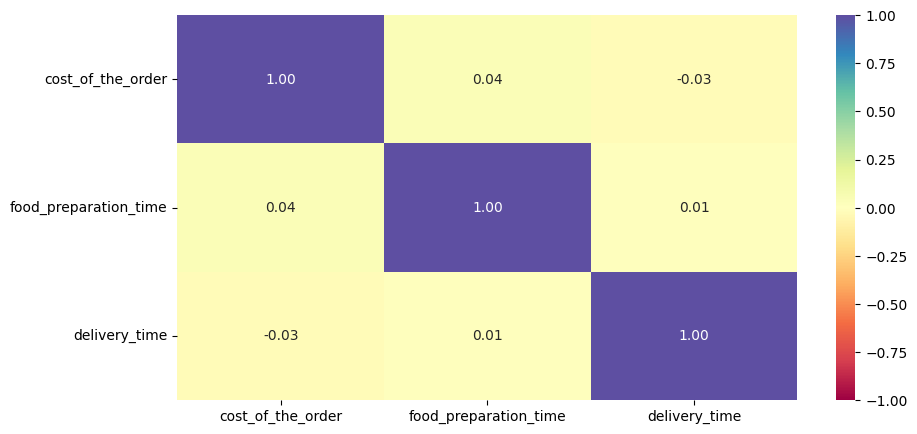

<Figure size 1000x500 with 0 Axes>

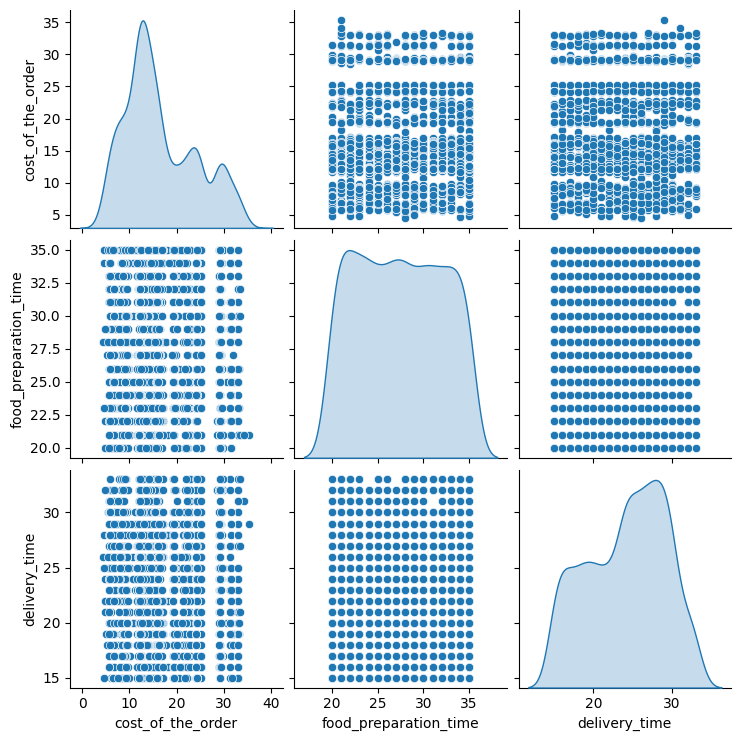

In [ ]:
# Check for correlation among numerical variables
num_var = ['cost_of_the_order','food_preparation_time','delivery_time']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

plt.figure(figsize=(10,5))
sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()

#### Observations: **As seen from above there does not seem to be any relationship between the numerical variables**

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Create a copy of dataset which excludes orders with no ratings
df_rating = df[df['rating']!= 'Not given'].copy()

# Convert rating datatype to integer
df_rating['rating'] = df_rating['rating'].astype('int')

# Calculate Count of order per Restaurant and the Avg. Rating of the Restaurant
df_rating_aggr = df_rating.groupby('restaurant_name')['rating'].agg(['count','mean'])
df_rating_aggr.sort_values(by=['count'], ascending=False, inplace=True)

# Renaming the columns
df_rating_aggr.rename(columns = {'count':'Total Count','mean':'Avg. Ratings'},inplace = True)

# Fulfiling the criteria of rating count more than 50 and avg. rating more than 4
df_rating_final = df_rating_aggr.loc[(df_rating_aggr['Total Count']>50) & (df_rating_aggr['Avg. Ratings']>4)]
df_rating_final

,Total Count,Avg. Ratings
restaurant_name,,
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905
Blue Ribbon Sushi,73,4.219178
Blue Ribbon Fried Chicken,64,4.328125


#### Observations: **There are 4 restaurants with rating count of more than 50 and the average rating greater than 4:**

**1. Shake Shack**

**2. The Meatball Shop**

**3. Blue Ribbon Sushi**

**4. Blue Ribbon Fried Chicken**

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Create a function to incorporate the Company Charge

def company_rev(x):
  if x > 20:
    return x*0.25
  elif x > 5:
    return x*0.15
  else:
    return 0

# Apply the function to the Cost of the Order to calculate the revenue
df['Total Revenue'] = df['cost_of_the_order'].apply(company_rev)

# Calculate the total Net Revenue generated from the orders
net_revenue = df['Total Revenue'].sum()
print(f'Total net revenue generated by the comany is ${round(net_revenue,2)}\n')
df[:5]

Total net revenue generated by the comany is $6166.3



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Total Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


#### Observations: **Total net revenue generated by the comany is $6166.3**


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate the total delivery time
df['time_to_deliver'] = df['food_preparation_time'] + df['delivery_time']

# Orders that take more than 60 minutes to deliver
df_more_than_60 = df[df['time_to_deliver']>60]

# Calculate %of orders that take more than 60mins. to deliver
perct_total = (df_more_than_60.shape[0] / df.shape[0]) * 100

print(f'{round(perct_total,2)}% of orders take more than 60 minutes to deliver the food once the order is placed')

10.54% of orders take more than 60 minutes to deliver the food once the order is placed


#### Observations: **10.54% of orders take more than 60 minutes to deliver the food once the order is placed**


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Get the mean delivery time for days of the week

print('The mean delivery time on Weekend is around',round(df[df['day_of_the_week']=='Weekend']['delivery_time'].mean(),2),'minutes')
print('The mean delivery time on Weekday is around',round(df[df['day_of_the_week']=='Weekday']['delivery_time'].mean(),2),'minutes')

The mean delivery time on Weekend is around 22.47 minutes
The mean delivery time on Weekday is around 28.34 minutes


#### Observations:

**1. The mean delivery time on Weekend is around 22.47 minutes**

**2. The mean delivery time on Weekday is around 28.34 minutes**





### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

#### **Insights:**

We analyzed a dataset of nearly 1898 orders for online food delivery service in New York. The data contains different attributes related to a food order like, food delivery time, food preparation time, order ratings, etc.. The main features of interest here are the cuisine type and customer ratings. Both from an online food delivery business and customer service perspective. Having  availability of delivery persons to deliver food for high demand cuisines and restaurants will improve the overall customer experience. Also, from the customer service perspective providing quality service where the company has poor ratings is equally important.

#### **Conclusions:**
  
1. Most of the food orders are places on Weekends.
2. Most orders are placed for American, Japanese, Italian and Chinese cuisines types throughout the week.
3. Orders with ratings, have ratings of 3 and above; 736 orders are not rated.
4. Average food preparation time for Korean and Vietnamese food is the lowest compared to other cuisines.
5. Average food delivery time is lowest for Korean cuisine, whereas it is highest for the Vietnamese cuisines.
6. Average food delivery time is approx. 24 mins with delivery times being longer on weekdays (approx. 28 mins) than weekends (approx. 22 mins).
7. Approx., 11% of orders take more than 60 minutes to deliver the food once the order is placed.
8. Food Preparation Time, Food Delivery Time and Cost of the order none have any impact on the ratings of the order.
9. We need to further investigate on attributes that drive customer ratings

#### **Recommendations:**

1. Although, American, Japanese, Italian and Chinese cuisines types are the most frequently ordered cuisines Mexican, Indian, Middle Eastern & Mediterranean are gaining momentum.
2. The number of orders are high on Weekends, delivery personnel availability must be ensured during these days.
3. The average delivery times are longer than usual on weekdays, turnaround time could be longer leading to further delays in other deliveries. Delivery personnel availability must be ensured during these days.
4. Data should be procured to understand overall driver behavior (did driver delivered the food at the correct address, driver interaction with customer, did driver deliver the correct food, etc..), freshness of food, and food packaging, etc to optimize the customer experience and satisfaction
5. More data should be procured on delivery personnel availability to get better understading of demand-supply status and build a model to accurately predict delivery per hour, to optimize the food delivery for respective cuisines, restaurants  and delivery on specific days of the week

